In [9]:
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Path
Barcelona = "../Data/FCBarcelona/03Stage/TargetFiles/67_4_3_1_footballDayPasses.csv"

In [11]:
try:
    # Read the CSV files into DataFrames
    metadataBarcelona = pd.read_csv(Barcelona, sep=",")
    #metadataArsenal = pd.read_csv(Arsenal, sep=",")
    # Now metadataManUnited and metadataManCity contain the data from the CSV files
except FileNotFoundError:
    print("One of the files does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", str(e))


GENERATE GRAPH

In [12]:
# Initialize a directed graph using NetworkX
G = nx.MultiDiGraph()

NODES

In [13]:
# Remove NaN values from the 'player_id' column
validRecipientId = metadataBarcelona.loc[metadataBarcelona['pass_recipient_id'].notna()]

validPlayerIds = validRecipientId["player_id"].dropna().unique()

G.add_nodes_from(validPlayerIds)

In [14]:
allNodes = list(G.nodes())
for node in allNodes:
    print(node)

# Print all the nodes at once
print("All nodes in the graph:", allNodes)

5211.0
5506.0
5213.0
4324.0
10609.0
5503.0
5216.0
3958.0
20131.0
4691.0
5246.0
5470.0
All nodes in the graph: [5211.0, 5506.0, 5213.0, 4324.0, 10609.0, 5503.0, 5216.0, 3958.0, 20131.0, 4691.0, 5246.0, 5470.0]


In [15]:
uniquePlayers = metadataBarcelona[['player_id', 'player_name']].drop_duplicates().dropna()

# Create a dictionary mapping player IDs to their names
playerNameDict = dict(zip(uniquePlayers['player_id'], uniquePlayers['player_name']))

# Set node attributes for names
nx.set_node_attributes(G, playerNameDict, name='label')

In [16]:
# Get all node attributes
nodeAttributes = nx.get_node_attributes(G, 'label')

# Print all node attributes at once
print("Node attributes:", nodeAttributes)


Node attributes: {5211.0: 'Jordi Alba Ramos', 5506.0: 'Javier Alejandro Mascherano', 5213.0: 'Gerard Piqué Bernabéu', 4324.0: 'Daniel Alves da Silva', 10609.0: 'Jérémy Mathieu', 5503.0: 'Lionel Andrés Messi Cuccittini', 5216.0: 'Andrés Iniesta Luján', 3958.0: 'Pedro Eliezer Rodríguez Ledesma', 20131.0: 'Xavier Hernández Creus', 4691.0: 'Claudio Andrés Bravo Muñoz', 5246.0: 'Luis Alberto Suárez Díaz', 5470.0: 'Ivan Rakitić'}


EDGES

In [17]:
def add_edges_with_attributes(row):
    # Extract relevant information
    playerId = row['player_id']
    passRecipientId = int(row['pass_recipient_id'])
    attributes = {
        'possession': float(row['possession']),
        'location_0': float(row['location_0']),
        'location_1': float(row['location_1']),
        'pass_length': float(row['pass_length']),
        'pass_height_id': float(row['pass_height_id']),
        'pass_end_location_0': float(row['pass_end_location_0']),
        'pass_end_location_1': float(row['pass_end_location_1']),
        'pass_outcome_name': str(row['pass_outcome_name'])
    }
    # Add edge with attributes to the graph
    G.add_edge(playerId, passRecipientId, **attributes)


In [18]:
# Apply the function to each row of the DataFrame
_ = validRecipientId.apply(add_edges_with_attributes, axis=1)

In [19]:
print("All nodes in the graph:", list(G.edges(data = True)))
print(len(list(G.edges())))

All nodes in the graph: [(5211.0, 5506, {'possession': 147.0, 'location_0': 29.2, 'location_1': 0.1, 'pass_length': 8.905055, 'pass_height_id': 2.0, 'pass_end_location_0': 32.9, 'pass_end_location_1': 8.2, 'pass_outcome_name': 'nan'}), (5211.0, 5503, {'possession': 147.0, 'location_0': 46.0, 'location_1': 12.1, 'pass_length': 23.345236, 'pass_height_id': 1.0, 'pass_end_location_0': 56.6, 'pass_end_location_1': 32.9, 'pass_outcome_name': 'nan'}), (5211.0, 5503, {'possession': 152.0, 'location_0': 110.9, 'location_1': 13.1, 'pass_length': 26.711983, 'pass_height_id': 3.0, 'pass_end_location_0': 111.7, 'pass_end_location_1': 39.8, 'pass_outcome_name': 'Incomplete'}), (5211.0, 5216, {'possession': 150.0, 'location_0': 76.0, 'location_1': 4.9, 'pass_length': 8.431489, 'pass_height_id': 1.0, 'pass_end_location_0': 69.0, 'pass_end_location_1': 9.6, 'pass_outcome_name': 'nan'}), (5211.0, 5470, {'possession': 150.0, 'location_0': 67.4, 'location_1': 5.6, 'pass_length': 22.105429, 'pass_height_i

VERIFICATION

In [20]:
assert len(list(G.edges())) == len(validRecipientId), f"number of edges and dataframe' size is not the same"

In [21]:
# Assuming you have a multidigraph named G
# Calculate the inDegree and outDegree for each node
inDegree = dict(G.in_degree())
outDegree = dict(G.out_degree())

# Print the inDegree, outDegree, and count for each node
print("Node Degrees:")
for node in G.nodes():
    in_degree = inDegree.get(node, 0)
    out_degree = outDegree.get(node, 0)
    total_degree = in_degree + out_degree
    print(f"Node {node}: InDegree = {in_degree}, OutDegree = {out_degree}, TotalDegree = {total_degree}")


Node Degrees:
Node 5211.0: InDegree = 5, OutDegree = 6, TotalDegree = 11
Node 5506.0: InDegree = 1, OutDegree = 1, TotalDegree = 2
Node 5213.0: InDegree = 4, OutDegree = 6, TotalDegree = 10
Node 4324.0: InDegree = 1, OutDegree = 2, TotalDegree = 3
Node 10609.0: InDegree = 3, OutDegree = 3, TotalDegree = 6
Node 5503.0: InDegree = 4, OutDegree = 3, TotalDegree = 7
Node 5216.0: InDegree = 9, OutDegree = 9, TotalDegree = 18
Node 3958.0: InDegree = 5, OutDegree = 5, TotalDegree = 10
Node 20131.0: InDegree = 6, OutDegree = 4, TotalDegree = 10
Node 4691.0: InDegree = 1, OutDegree = 2, TotalDegree = 3
Node 5246.0: InDegree = 4, OutDegree = 2, TotalDegree = 6
Node 5470.0: InDegree = 3, OutDegree = 3, TotalDegree = 6


In [44]:
nodes = list(G.nodes())

# Calculate in-degree and out-degree for each node using list comprehensions
inDegree = list(dict(G.in_degree()).values())
outDegree = list(dict(G.out_degree()).values())

# Combine node IDs with their respective in-degree and out-degree using zip
node_degrees_in = dict(zip(nodes, inDegree))
node_degrees_out = dict(zip(nodes, outDegree))
print(node_degrees_in)
print(node_degrees_out)

{5211.0: 5, 5506.0: 1, 5213.0: 4, 4324.0: 1, 10609.0: 3, 5503.0: 4, 5216.0: 9, 3958.0: 5, 20131.0: 6, 4691.0: 1, 5246.0: 4, 5470.0: 3}
{5211.0: 6, 5506.0: 1, 5213.0: 6, 4324.0: 2, 10609.0: 3, 5503.0: 3, 5216.0: 9, 3958.0: 5, 20131.0: 4, 4691.0: 2, 5246.0: 2, 5470.0: 3}


DISTRIBUTION DEGREE GRAPHIC

In [22]:
# Assuming you have already calculated inDegree using in_degree() method
inDegree = list(dict(G.in_degree()).values())
outDegree = list(dict(G.out_degree()).values())
print(inDegree)

[5, 1, 4, 1, 3, 4, 9, 5, 6, 1, 4, 3]


In [23]:
def plotDegreeDistribution(degrees, outputFilePath, type):
    # Plot the degree distribution
    plt.boxplot(degrees)
    plt.xlabel('Nodes', fontsize='large')
    plt.ylabel(f"{type}-Degree", fontsize='large')
    plt.title(f'{type}-Degree Distribution', fontsize='large')
    plt.savefig(outputFilePath)
    plt.show()

In [24]:
# Get the current working directory
currentDirectory = os.getcwd()

In [25]:
# Specify the output file name
outputFileNameInDegree = 'inDegreeDistribution.pdf'
outputFileNameOutDegree = 'outDegreeDistribution.pdf'

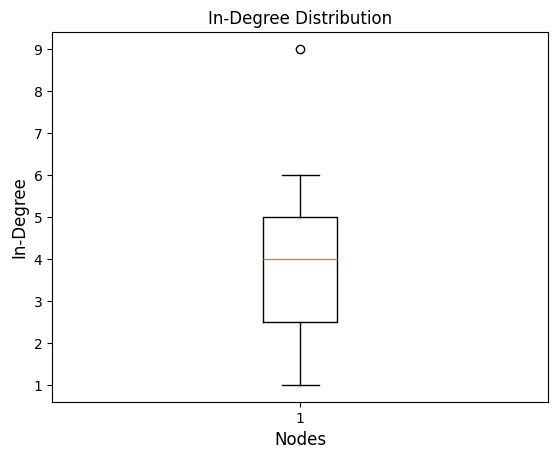

In [26]:
plotDegreeDistribution(inDegree, outputFileNameInDegree, "In")

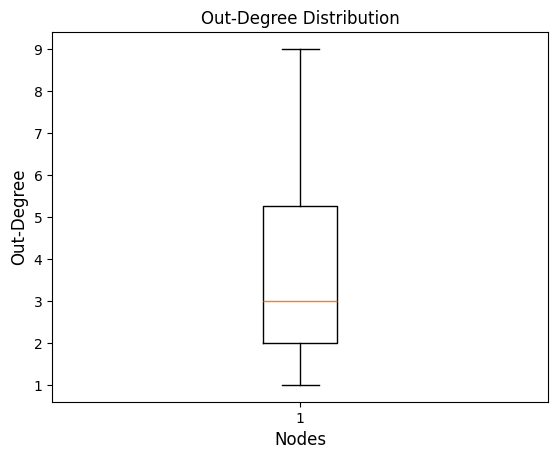

In [27]:
plotDegreeDistribution(outDegree, outputFileNameOutDegree, "Out")

SAVE GRAPH AS FILE

In [28]:
# Specify the output file name
outputFileName = 'individualTest.graphml'

# Combine the directory path and file name
outputFilePath = os.path.join(currentDirectory, outputFileName)

# Write the graph to the GraphML file
nx.write_gexf(G, outputFilePath, version="1.2draft", encoding="utf-8", prettyprint=True)

READ AND TESTTHE GENERATE GRAPH

In [29]:
graph = nx.read_gexf("individualTest.graphml")
nodes= list(graph.nodes())
edgeAttributes = list(graph.edges(data=True))
numberOfEdges = graph.number_of_edges()
# Print all the nodes at once
print("All nodes in the graph:", nodes)
print(edgeAttributes)
print(numberOfEdges)

All nodes in the graph: ['5211.0', '5506.0', '5213.0', '4324.0', '10609.0', '5503.0', '5216.0', '3958.0', '20131.0', '4691.0', '5246.0', '5470.0', '5506', '5503', '5216', '5470', '5246', '5213', '4324', '10609', '4691', '20131', '5211', '3958']
[('5211.0', '5506', {'possession': 147.0, 'location_0': 29.2, 'location_1': 0.1, 'pass_length': 8.905055, 'pass_height_id': 2.0, 'pass_end_location_0': 32.9, 'pass_end_location_1': 8.2, 'pass_outcome_name': 'nan', 'id': '0'}), ('5211.0', '5503', {'possession': 147.0, 'location_0': 46.0, 'location_1': 12.1, 'pass_length': 23.345236, 'pass_height_id': 1.0, 'pass_end_location_0': 56.6, 'pass_end_location_1': 32.9, 'pass_outcome_name': 'nan', 'id': '1'}), ('5211.0', '5503', {'possession': 152.0, 'location_0': 110.9, 'location_1': 13.1, 'pass_length': 26.711983, 'pass_height_id': 3.0, 'pass_end_location_0': 111.7, 'pass_end_location_1': 39.8, 'pass_outcome_name': 'Incomplete', 'id': '2'}), ('5211.0', '5216', {'possession': 150.0, 'location_0': 76.0, 